# Diode Analysis
Plotting and fitting diode data for Advanced Lab

In [1]:
# import modules
import pandas as pd
import numpy as np
from numpy import array, arange, pi, exp, sin, cos, polyfit, poly1d, linspace, zeros, flipud
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import fmin


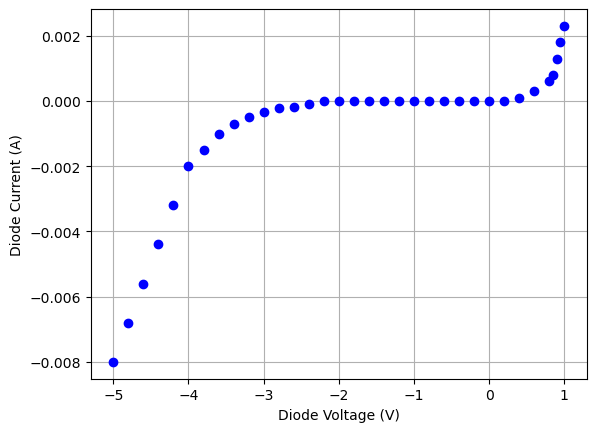

In [12]:
zener_df = pd.read_excel('DiodeIVJupyter.xlsx', 'zener', index_col=None, na_values=['NA'])
zenerfake_df = pd.read_excel('DiodeIVJupyter.xlsx', 'zenerfake', index_col=None, na_values=['NA'])
silicon_df = pd.read_excel('DiodeIVJupyter.xlsx', 'silicon', index_col=None, na_values=['NA'])
PV_nolight_df = pd.read_excel('DiodeIVJupyter.xlsx', 'PV_nolight', index_col=None, na_values=['NA'])
PV_light_df = pd.read_excel('DiodeIVJupyter.xlsx', 'PV_light', index_col=None, na_values=['NA'])
plt.plot(zenerfake_df['Vd'], zenerfake_df['I'], 'bo')
plt.xlabel('Diode Voltage (V)')
plt.ylabel('Diode Current (A)')
plt.grid(True)
plt.savefig('zener.svg')
plt.show()

## Plot the zener and silicon data


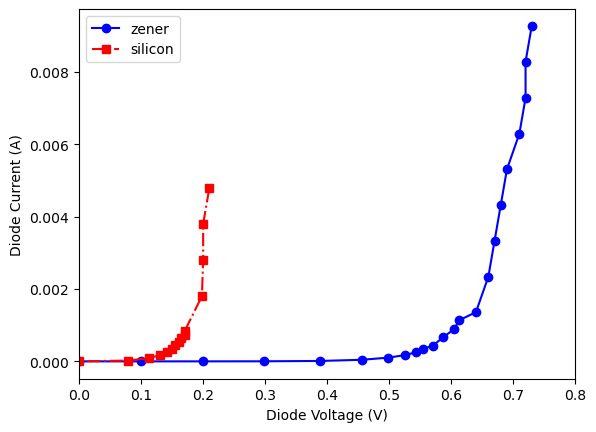

In [3]:
plt.plot(zener_df['Vd'], zener_df['I'], 'b-o', label='zener')
plt.plot(silicon_df['Vd'], silicon_df['I'], 'r-.s', label='silicon')
plt.xlabel('Diode Voltage (V)')
plt.ylabel('Diode Current (A)')
plt.xlim(0, 0.8)
plt.legend(loc=0)
plt.show()

# Transcendental Solution
This doesn't seem to work. I'm not sure what I'm doing wrong.

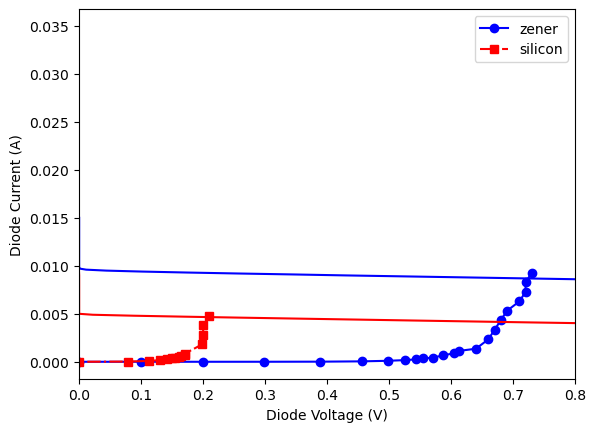

In [4]:
zener_df['VsIs']= (zener_df['Vin'].max()-zener_df['Vin'])/1000
silicon_df['VsIs']= (silicon_df['Vin'].max()-silicon_df['Vin'])/1000

plt.plot(zener_df['Vd'], zener_df['I'], 'b-o', label='zener')
plt.plot(zener_df['VR'], zener_df['VsIs'], '-b')
plt.plot(silicon_df['Vd'], silicon_df['I'], 'r-.s', label='silicon')
plt.plot(silicon_df['VR'], silicon_df['VsIs'], '-r')

plt.xlabel('Diode Voltage (V)')
plt.ylabel('Diode Current (A)')
plt.xlim(0, 0.8)
plt.legend(loc=0)
plt.show()

[ 0.08613873 -0.05422254] [[ 3.00443210e-05 -2.07639640e-05]
 [-2.07639640e-05  1.43758736e-05]]
[ 0.149  -0.0265] [[ 0.0075     -0.001525  ]
 [-0.001525    0.00031025]]


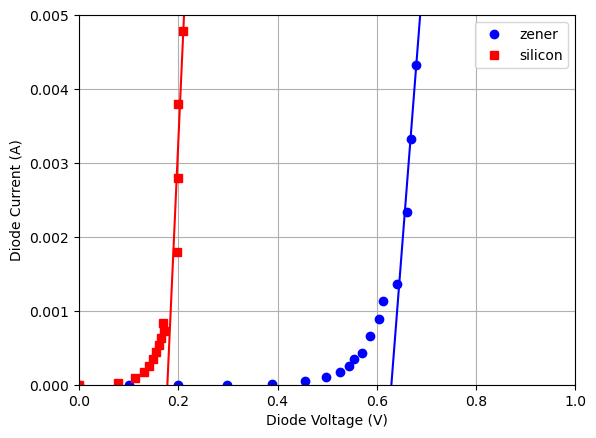

In [5]:
# curve_fit optization
def f_line(x, a, b):
    return a*x + b

a = 0.01
b = -1

#Get zener fit
xtemp = zener_df['Vd'].loc[zener_df['Vd'] > 0.63]
ytemp = zener_df['I'].loc[zener_df['Vd'] > 0.63]
zener_params, zener_pcov = curve_fit(f_line, xtemp, ytemp, (a,b))

#Get silicon fit
xtemp = silicon_df['Vd'].loc[silicon_df['Vd'] > 0.199]
ytemp = silicon_df['I'].loc[silicon_df['Vd'] > 0.199]
silicon_params, silicon_pcov = curve_fit(f_line, xtemp, ytemp, (a,b))

#Print fit params
print(zener_params, zener_pcov)
print(silicon_params, silicon_pcov)

#Plot the results
xx = linspace(0,1, 200)
plt.plot(zener_df['Vd'], zener_df['I'], 'bo', label='zener')
plt.plot(xx, f_line(xx, *zener_params), '-b')
plt.plot(silicon_df['Vd'], silicon_df['I'], 'rs', label='silicon')
plt.plot(xx, f_line(xx, *silicon_params), '-r')
plt.legend(loc=0)
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0,0.005)
plt.xlabel('Diode Voltage (V)')
plt.ylabel('Diode Current (A)')
plt.show()

In [6]:
zener_V_on = -zener_params[1]/zener_params[0]
silicon_V_on = -silicon_params[1]/silicon_params[0]
print(zener_V_on, silicon_V_on)

0.6294792647914049 0.1778523489932824


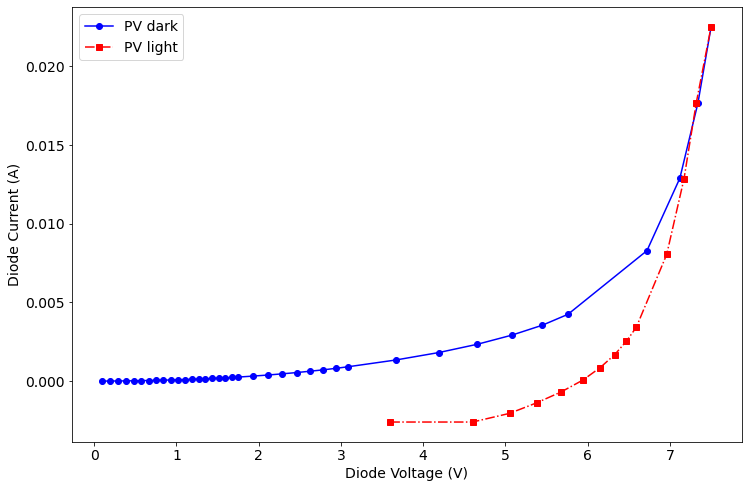

In [ ]:
plt.plot(PV_nolight_df['Vd'], PV_nolight_df['I'], 'b-o', label='PV dark')
plt.plot(PV_light_df['Vd'], PV_light_df['I'], 'r-.s', label='PV light')
plt.xlabel('Diode Voltage (V)')
plt.ylabel('Diode Current (A)')
#plt.xlim(0, 0.8)
plt.legend(loc=0)
plt.show()